Copyright **`(c)`** 2025 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free under certain conditions — see the [`license`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

In [50]:
from itertools import accumulate
from icecream import ic
import numpy as np
from tqdm.auto import tqdm
from matplotlib import pyplot as plt

In [51]:
NUM_KNAPSACKS = 2
NUM_ITEMS = 10
NUM_DIMENSIONS = 2

In [52]:
VALUES = np.random.randint(0, 100, size=NUM_ITEMS)
WEIGHTS = np.random.randint(0, 100, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = np.random.randint(0, 100 * NUM_ITEMS // NUM_KNAPSACKS, size=NUM_DIMENSIONS)

In [53]:
VALUES

array([39, 49, 79, 79, 56, 98, 20, 27, 43, 18], dtype=int32)

In [261]:
WEIGHTS

array([[832, 199, 804,   7, 796, 786, 780, 664, 471, 705],
       [277, 780, 555, 458, 505, 568,  37, 139, 245, 114],
       [439, 668, 654, 471, 855, 565,  79, 764, 574, 634],
       [565, 553,  90, 559, 794, 303, 602,  30, 347, 436],
       [982, 214, 276, 408, 992, 853,  34, 233, 821,  58],
       [855, 281, 917, 293, 434, 661, 126, 557, 505, 783],
       [996, 664, 409, 406, 417, 814, 321, 166, 334,  22],
       [106,  90, 771, 722, 696, 461, 717, 161, 900, 501],
       [938, 152, 497, 696, 495, 446, 166, 381, 238, 301],
       [683, 630, 607, 361, 959,  87, 342, 118, 338, 961],
       [366, 908, 495, 699, 457, 265, 764, 969, 263, 778],
       [261, 716, 789, 449, 736, 272,  79,  96, 447, 902],
       [127, 455, 704, 202, 721, 305, 808, 579, 546, 176],
       [463, 856,  19, 758, 492, 719, 663, 432, 308, 627],
       [140, 584,  94, 649, 628,  84, 757, 415, 786,  41],
       [179, 493, 188, 329, 660, 144, 677, 103, 175, 587],
       [793, 170, 299, 925, 989, 581, 447, 346, 612, 590

In [105]:
CONSTRAINTS

array([614, 496])

In [262]:
# A random solution
solution = np.array(
    [np.random.random(NUM_ITEMS) < 0.5 for _ in range(NUM_KNAPSACKS)], dtype=np.bool
)

In [263]:
solution

array([[ True,  True,  True,  True,  True,  True,  True, False, False,
        False,  True,  True,  True, False,  True, False, False, False,
        False,  True, False, False, False,  True,  True, False, False,
         True,  True,  True,  True, False,  True,  True,  True, False,
        False, False,  True, False, False, False,  True, False,  True,
         True, False, False, False,  True,  True, False,  True,  True,
        False,  True, False,  True,  True,  True, False,  True,  True,
        False,  True, False,  True, False,  True,  True,  True,  True,
        False, False,  True,  True,  True, False,  True, False, False,
         True, False, False,  True,  True, False,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True, False,  True,
        False],
       [ True, False, False, False,  True,  True, False, False, False,
         True, False,  True,  True,  True,  True, False, False,  True,
        False, False, False,  True,  True, False, False,  Tru

In [264]:
# Check that the same object does not appear in multiple knapsacks
np.all(solution.sum(axis=0) <= 1)

np.False_

In [265]:
# Check if the solution is valid
all_knapsacks = np.any(solution, axis=0)
np.all(WEIGHTS[all_knapsacks].sum(axis=0) < CONSTRAINTS)

np.False_

## TEST PROBLEMS

In [274]:
# Problem 1:
rng = np.random.default_rng(seed=42)
NUM_KNAPSACKS = 3
NUM_ITEMS = 20
NUM_DIMENSIONS = 2
VALUES = rng.integers(0, 100, size=NUM_ITEMS)
WEIGHTS = rng.integers(0, 100, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = rng.integers(0, 100 * NUM_ITEMS // NUM_KNAPSACKS, size=NUM_DIMENSIONS)

In [251]:
# Problem 2:
rng = np.random.default_rng(seed=42)
NUM_KNAPSACKS = 10
NUM_ITEMS = 100
NUM_DIMENSIONS = 10
VALUES = rng.integers(0, 1000, size=NUM_ITEMS)
WEIGHTS = rng.integers(0, 1000, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = rng.integers(1000 * 2, 1000 * NUM_ITEMS // NUM_KNAPSACKS, size=NUM_DIMENSIONS)

In [271]:
# Problem 3:
rng = np.random.default_rng(seed=42)
NUM_KNAPSACKS = 100
NUM_ITEMS = 5000
NUM_DIMENSIONS = 100
VALUES = rng.integers(0, 1000, size=NUM_ITEMS)
WEIGHTS = rng.integers(0, 1000, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = rng.integers(1000 * 10, 1000 * 2 * NUM_ITEMS // NUM_KNAPSACKS, size=NUM_DIMENSIONS)

RMHC with a more powerfull twick

In [253]:
MAX_STEPS = 20000

In [ ]:
def evaluate(knapsack):
    if all(np.sum(WEIGHTS[knapsack], axis=0) < CONSTRAINTS):
        return np.sum(VALUES[knapsack])
    else:
       return -1

In [266]:
def tweak(knapsack, items_taken):
    new_knapsack = knapsack.copy()
    index = None
    while index is None or np.random.random() < 0.4:
        index = np.random.randint(0, NUM_ITEMS)
        if items_taken[index] == True:
            index = None
        else:
            new_knapsack[index] = not new_knapsack[index]
    return new_knapsack


100%|██████████| 20000/20000 [00:01<00:00, 15218.51it/s]
ic| evaluate(best_solution): np.int64(771)
ic| history.index(evaluate(best_solution)): 13612
100%|██████████| 20000/20000 [00:01<00:00, 12315.01it/s]
ic| evaluate(best_solution): np.int64(278)
ic| history.index(evaluate(best_solution)): 939
100%|██████████| 20000/20000 [00:03<00:00, 6341.03it/s]
ic| evaluate(best_solution): np.int64(16)
ic| history.index(evaluate(best_solution)): 4


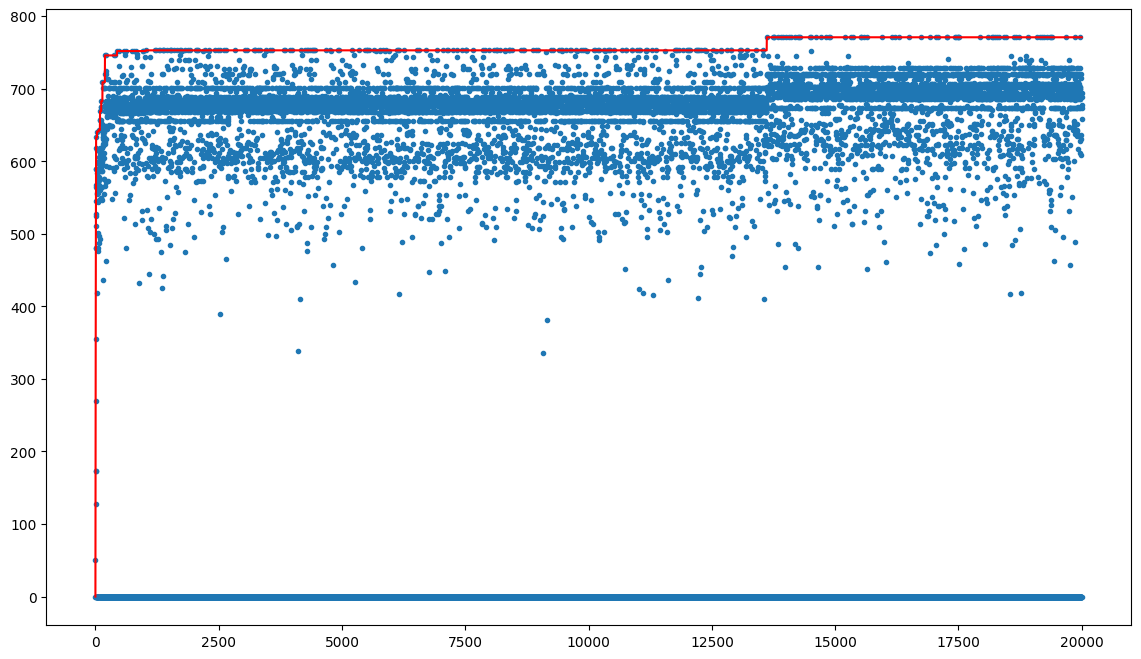

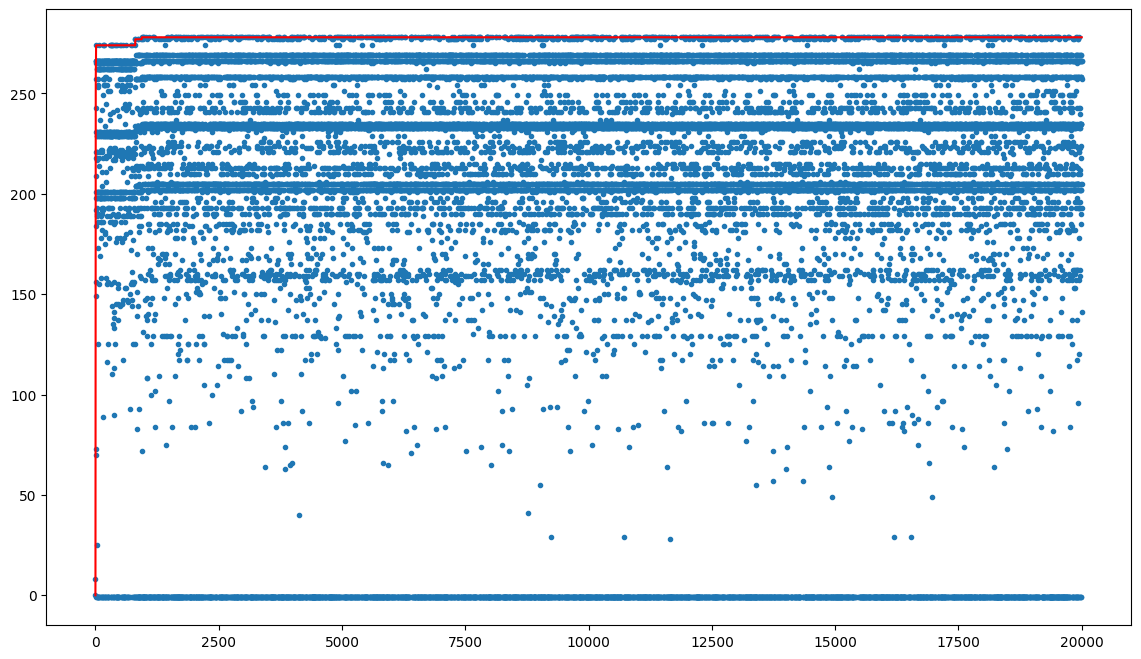

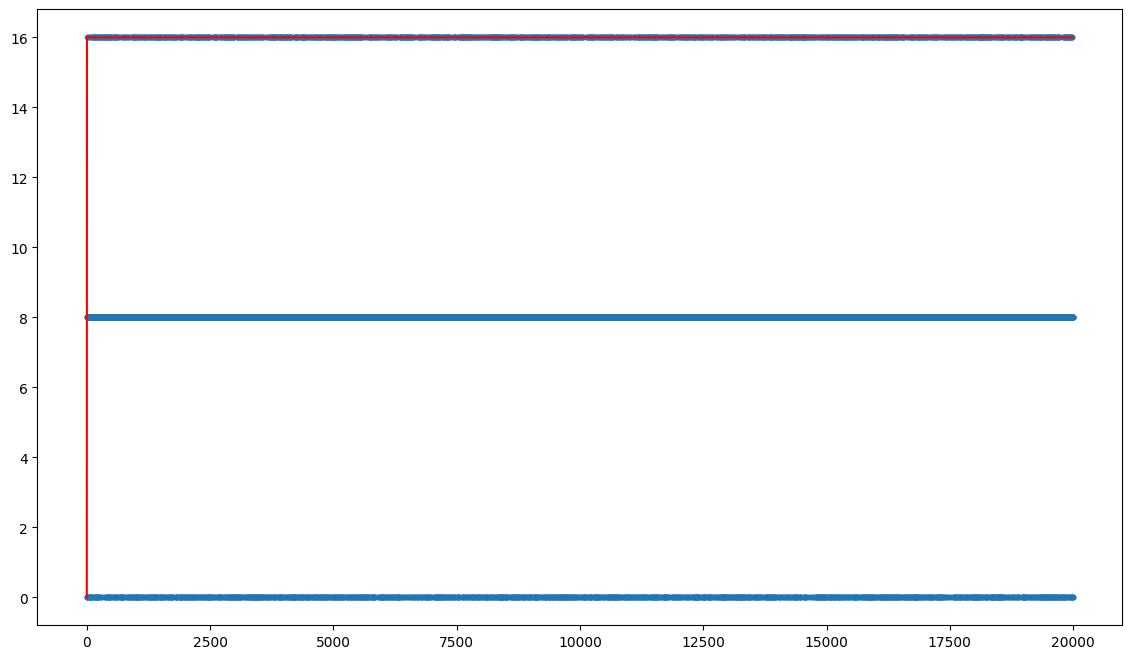

In [275]:
solution = np.full((NUM_KNAPSACKS, NUM_ITEMS), False)
items_taken = np.full(NUM_ITEMS, False)

for knapsack_id in range(NUM_KNAPSACKS):
    knapsack = solution[knapsack_id]
    best_solution = knapsack

    history = [evaluate(best_solution)]
    for n in tqdm(range(MAX_STEPS)):
        new_solution = tweak(best_solution, items_taken)
        history.append(evaluate(new_solution))
        if evaluate(new_solution) > evaluate(best_solution):
            best_solution = new_solution

    items_taken = items_taken + best_solution
    solution[knapsack_id] = best_solution

    # That's all...
    ic(evaluate(best_solution))
    ic(history.index(evaluate(best_solution)))

    plt.figure(figsize=(14, 8))
    plt.plot(
        range(len(history)),
        list(accumulate(history, max)),
        color="red",
    )
    _ = plt.scatter(range(len(history)), history, marker=".")

In [273]:
total_value = 0
total_weights = np.zeros((NUM_KNAPSACKS, WEIGHTS.shape[1]))

for knapsack_id in range(NUM_KNAPSACKS):
    total_value += np.sum(VALUES[solution[knapsack_id]], axis=0)
    total_weights[knapsack_id] = np.sum(WEIGHTS[solution[knapsack_id]], axis=0)

print(total_value)

#ic(total_weights)

#print("Vincoli", CONSTRAINTS)

1441392


In [237]:
solution

array([[False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
         True,  True, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False,
         True, False, False, False, False, False,  True, Fals